In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.gridspec as gridspec

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


OUT_DIR = os.path.join("..", "..", "..", "output")
FILENAMES = [["many_obs_many_blocks_marginals.csv",
              "many_obs_many_blocks_paths.csv",
              "many_obs_many_blocks_chain.csv"],
             ["many_obs_medium_blocks_marginals.csv",
              "many_obs_medium_blocks_paths.csv",
              "many_obs_medium_blocks_chain.csv"],
             ["many_obs_long_blocks_marginals.csv",
              "many_obs_long_blocks_paths.csv",
              "many_obs_long_blocks_chain.csv"]
             ]

In [2]:
TRUE_VAL_AT_ONE = [2.812, 5.137, 14.305]
TRUE_VAL_AT_ONE_AND_HALF = [2.6407, -2.38585, 25.9631]
TRUE_PARAM = [10.0, 28.0, 8.0/3.0, 3.0]

In [3]:
def plot_results(filenames, i_range_from, i_range_to, savename=None, titles=["Short blocks", "Long blocks", "No blocking"],
                 mid_pt_idx=3, true_vals=TRUE_VAL_AT_ONE_AND_HALF, labels=[r"$X_{1.5}$", r"$Y_{1.5}$", r"$Z_{1.5}$"]):
    fig = plt.figure(figsize=(15,18))
    gs = gridspec.GridSpec(9, 18)
    ax = set_up_axes(fig, gs)
    for i in range(3):
        plot_results_of_a_run(ax[i], filenames[i], i_range_from, i_range_to, i==0, mid_pt_idx, true_vals)
        
    ax[0][0].set_title(titles[0])
    ax[1][0].set_title(titles[1])
    ax[2][0].set_title(titles[2])
    ax[0][1].set_ylabel(labels[0])
    ax[0][2].set_ylabel(labels[1])
    ax[0][3].set_ylabel(labels[2])
    ax[0][4].set_ylabel(r"$\theta_{1}$")
    ax[0][5].set_ylabel(r"$\theta_{2}$")
    ax[0][6].set_ylabel(r"$\theta_{3}$")
    ax[0][6].set_xlabel("Iteration index (in thousands)")
    ax[1][6].set_xlabel("Iteration index (in thousands)")
    ax[2][6].set_xlabel("Iteration index (in thousands)")
    fig.subplots_adjust(left = 0.08, right = 0.99, bottom = 0.05, top = 0.97, wspace = 0.02, hspace = 0.02)
    if savename is not None:
        plt.savefig(savename, dpi=100)
    plt.show()

def set_up_axes(fig, gs):
    ax = [[] for i in range(3)]
    for i in range(3):
        ax[i].append(fig.add_subplot(gs[0:3,6*i:(6*i+6)], projection='3d'))
        Axes3D.get_proj=get_proj_scale
        for j in range(6):
            if i == 0 and j == 0:
                sharex = None
                sharey = None
            elif j == 0:
                sharex = None
                sharey = ax[0][1]
            elif i == 0:
                sharex = ax[0][1]
                sharey = None
            else:
                sharex = ax[i][1]
                sharey = ax[0][j+1]
            ax[i].append(fig.add_subplot(gs[3+j,6*i:(6*i+6)],sharex=sharex,sharey=sharey))
    #for j in range(7):
    #    ax[3].append(fig.add_subplot(gs[3+j,9:12]))
    return ax
    
        
def plot_results_of_a_run(ax, filename, i_range_from, i_range_to, keep_y_labels=False, mid_pt_idx=3,
                          true_vals=TRUE_VAL_AT_ONE_AND_HALF):
    data = pd.read_csv(os.path.join(OUT_DIR, filename[0]))
    tp = np.array(data.iloc[:,mid_pt_idx])
    for i in range(3):
        xx = tp[1+i:-1:3][i_range_from:i_range_to]
        ax[1+i].plot(xx, color="steelblue", linewidth=0.5)
        xlims = ax[1+i].get_xlim()
        ax[1+i].plot(xlims, [true_vals[i], true_vals[i]],
                linestyle="dashed", color="black")
        ax[1+i].set_xlim(xlims)
        ax[1+i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        if not keep_y_labels:
            ax[1+i].tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
        
    data = pd.read_csv(os.path.join(OUT_DIR, filename[2]))
    for i in range(3):
        xx = data.iloc[:,i][i_range_from:i_range_to]
        ax[4+i].plot(xx, color="steelblue", linewidth=0.5)
        xlims = ax[4+i].get_xlim()
        ax[4+i].plot(xlims, [TRUE_PARAM[i], TRUE_PARAM[i]],
                     linestyle="dashed", color="black")
        ax[4+i].set_xlim(xlims)
        if i != 2:
            ax[4+i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        else:
            ax[4+i].set_xticklabels([None, r"$0$", r"$5$", r"$10$"])
        if not keep_y_labels:
            ax[4+i].tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
            

    plot_3d_path(ax[0], filename[1], alpha=0.1)
#data = pd.read_csv(os.path.join(OUT_DIR, FILENAMES[0]))
#tp = np.array(data.iloc[len(data)//2,:])
#for i in range(3):
#    ax = fig.add_subplot(gs[3+i,0:3])
#    xx = tp[1+i:-1:3]
#    ax.plot(xx, color="steelblue", linewidth=0.5)
#    ax.plot([0.0, len(xx)], [TRUE_VAL_AT_TWO[i], TRUE_VAL_AT_TWO[i]],
#            linestyle="dashed", color="black")

#data = pd.read_csv(os.path.join(OUT_DIR, FILENAMES[2]))
#for i in range(4):
#    ax = fig.add_subplot(gs[6+i,0:3])
#    xx = data.iloc[:,i]
#    ax.plot(xx, color="steelblue", linewidth=0.5)
#    ax.plot([0.0, len(xx)], [TRUE_PARAM[i], TRUE_PARAM[i]],
#            linestyle="dashed", color="black")   
#plt.show()

In [4]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib import rcParams
rcParams.update({'font.size': 22})

def setup_scale(scale_x = 1.0, scale_y = 1.0, scale_z = 1.0):

    #Axes are scaled down to fit in scene
    max_scale=max(scale_x, scale_y, scale_z)

    scale_x=scale_x/max_scale
    scale_y=scale_y/max_scale
    scale_z=scale_z/max_scale

    #Create scaling matrix
    scale = np.array([[scale_x,0,0,0],
                      [0,scale_y,0,0],
                      [0,0,scale_z,0],
                      [0,0,0,1]])
    return scale
    
SCALE = setup_scale()
    
def get_proj_scale(self):
    """
    Create the projection matrix from the current viewing position.

    elev stores the elevation angle in the z plane
    azim stores the azimuth angle in the x,y plane

    dist is the distance of the eye viewing point from the object
    point.

    """
    relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

    xmin, xmax = self.get_xlim3d()
    ymin, ymax = self.get_ylim3d()
    zmin, zmax = self.get_zlim3d()

    # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0
    worldM = proj3d.world_transformation(
        xmin, xmax,
        ymin, ymax,
        zmin, zmax)

    # look into the middle of the new coordinates
    R = np.array([0.5, 0.5, 0.5])

    xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
    yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
    zp = R[2] + np.sin(relev) * self.dist
    E = np.array((xp, yp, zp))

    self.eye = E
    self.vvec = R - E
    self.vvec = self.vvec / proj3d.mod(self.vvec)

    if abs(relev) > np.pi/2:
    # upside down
        V = np.array((0, 0, -1))
    else:
        V= np.array((0, 0, 1))
    zfront, zback = -self.dist, self.dist

    viewM = proj3d.view_transformation(E, R, V)
    perspM = proj3d.persp_transformation(zfront, zback)
    M0 = np.dot(viewM, worldM)
    M = np.dot(perspM, M0)

    return np.dot(M, SCALE);

def setup_3d_plot():
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    Axes3D.get_proj=get_proj_scale
    plt.tight_layout()
    return ax


#ax.plot(path[:,0], path[:,1], zs=path[:,2], linewidth=0.4, label='entire path')
def plot_3d_path(ax, filename, skip=1, num_steps=24, i_from=None, i_to=None, alpha=0.3):
    data = pd.read_csv(os.path.join(OUT_DIR, filename))
    cmap = plt.get_cmap('ocean')(np.linspace(0,1,2))
    cmap2 = plt.get_cmap('ocean')(np.linspace(0,1,num_steps))
    stride = len(data)//num_steps
    print("remainder: ", len(data) - num_steps*stride)
    
    if i_from is None:
        i_from = 0
    if i_to is None:
        i_to = (len(data.columns)-1)//3
        
    for j in range(i_from, i_to):
        for i in range(num_steps):
            n = j*3+1
            st = i*stride
            en = (i+1)*stride
            ax.plot(np.array(data.iloc[:,n][st:en:skip]),
                    np.array(data.iloc[:,n+1][st:en:skip]),
                    np.array(data.iloc[:,n+2][st:en:skip]), alpha=alpha,
                    color=cmap2[i], linewidth=0.8, label='')
            
    ax.set_xlim([-20,15])
    ax.set_ylim([-15,24])
    ax.set_zlim([10,40])
    #ax.legend()
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for label in ax.xaxis.get_ticklabels():
        label.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for label in ax.yaxis.get_ticklabels():
        label.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
    for label in ax.zaxis.get_ticklabels():
        label.set_visible(False)




remainder:  0
remainder:  0
remainder:  0


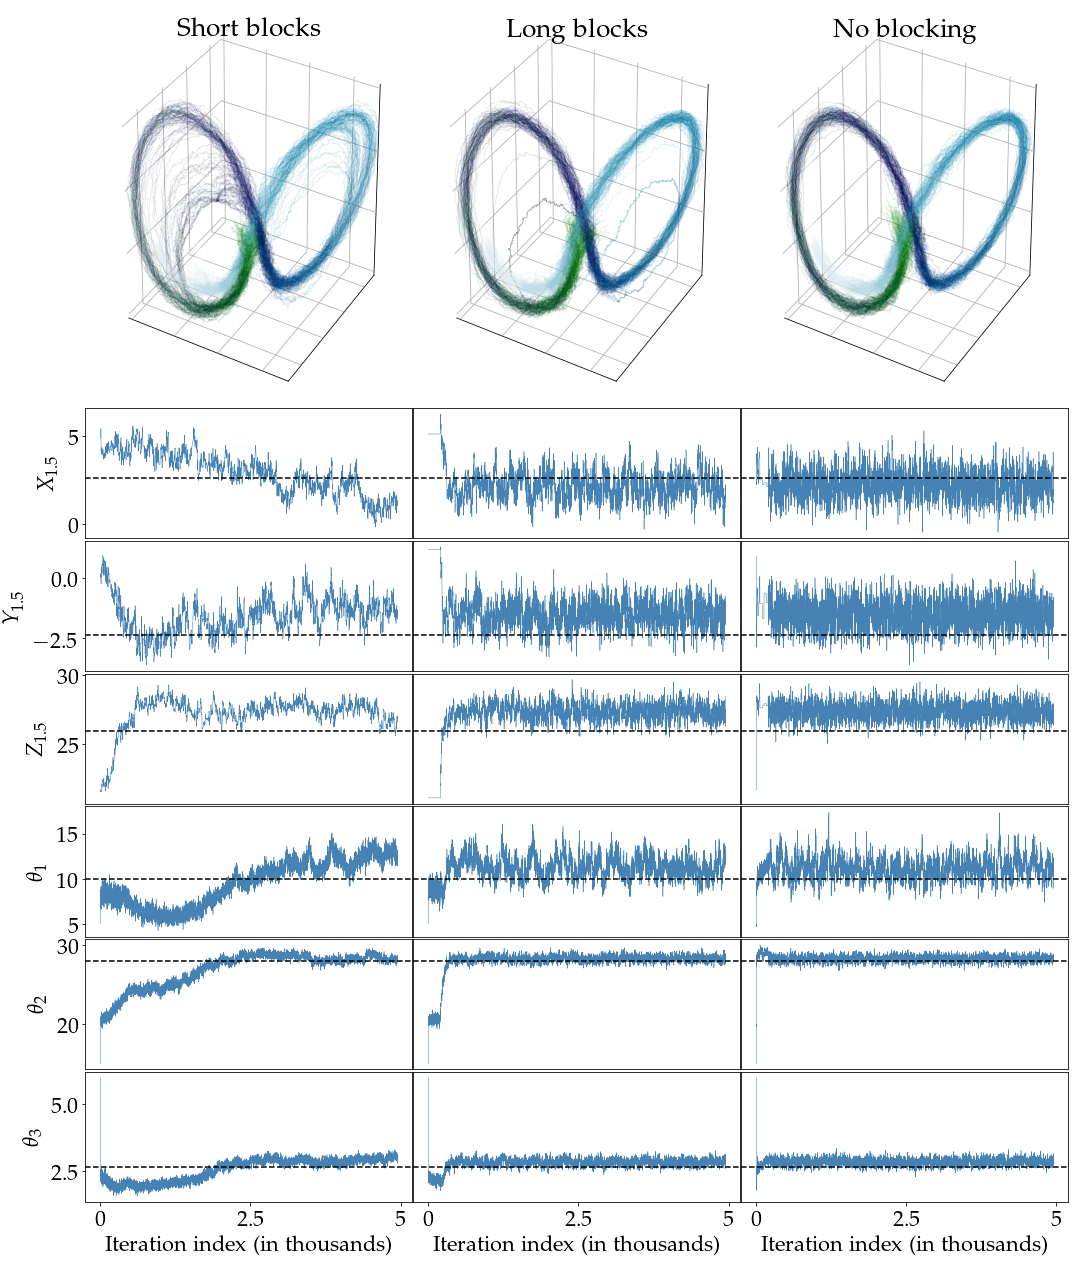

In [67]:
plot_results(FILENAMES, 0, 10001, savename=os.path.join(OUT_DIR, "lorenz_system_dense_obs_results.png"))

remainder:  18
remainder:  18
remainder:  18


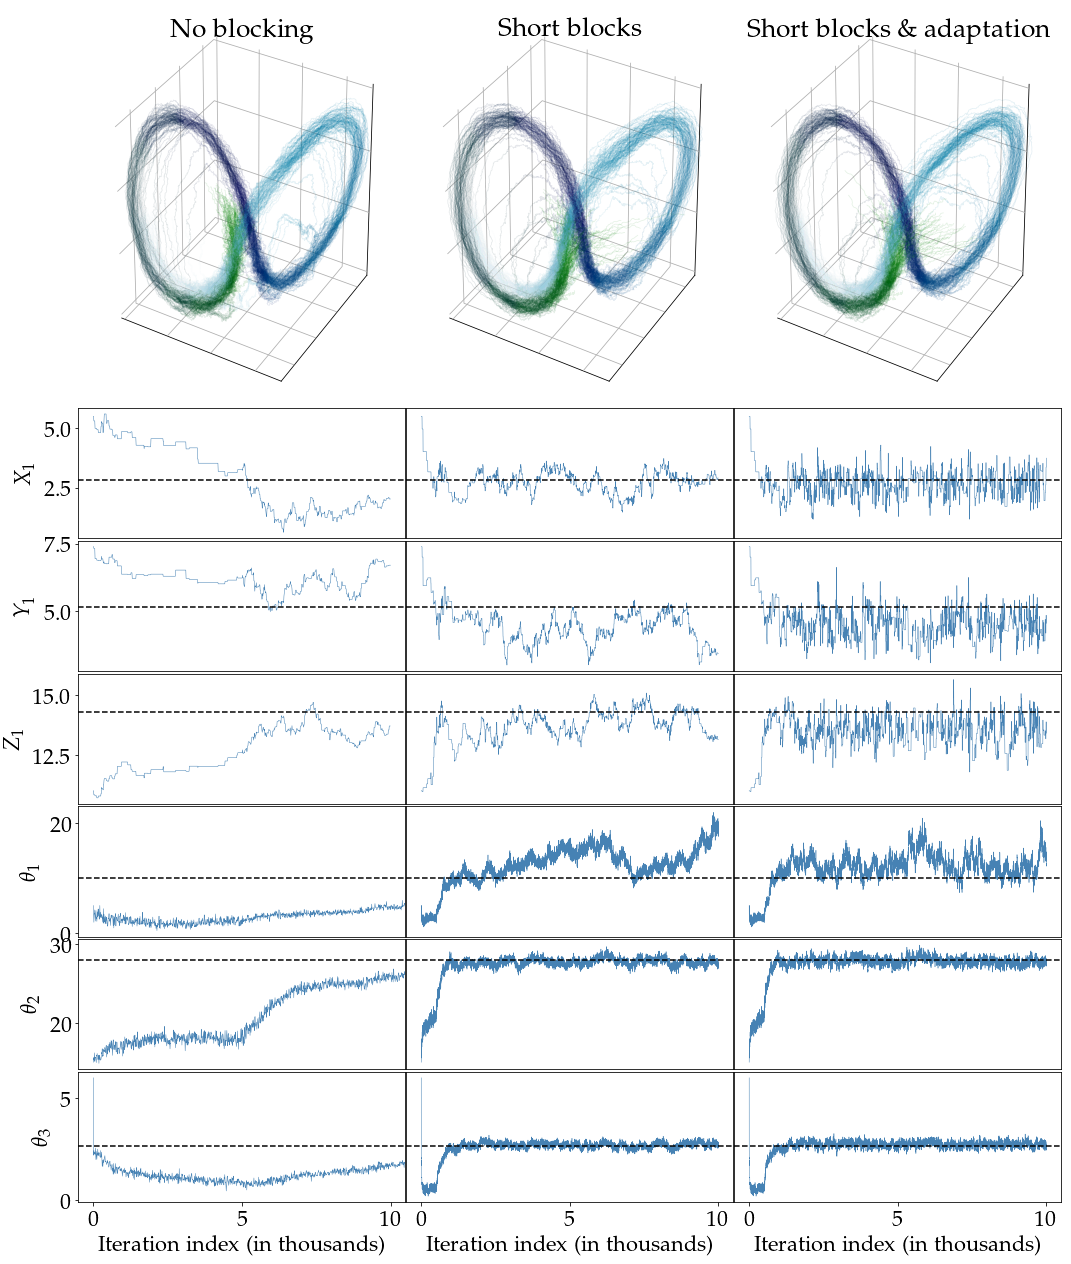

In [80]:
FILENAMES2 = [["few_obs_long_blocks_marginals.csv",
               "few_obs_long_blocks_paths.csv",
               "few_obs_long_blocks_chain.csv"],
              ["few_obs_many_blocks_marginals.csv",
               "few_obs_many_blocks_paths.csv",
               "few_obs_many_blocks_chain.csv"],
              ["few_obs_many_blocks_and_adpt_marginals.csv",
               "few_obs_many_blocks_and_adpt_paths.csv",
               "few_obs_many_blocks_and_adpt_chain.csv"]
              ]

plot_results(FILENAMES2, 0, 10001, savename=os.path.join(OUT_DIR, "lorenz_system_sparse_obs_results.png"),
             titles=["No blocking", "Short blocks", "Short blocks \& adaptation"], mid_pt_idx=2,
             true_vals=TRUE_VAL_AT_ONE, labels=[r"$X_{1}$", r"$Y_{1}$", r"$Z_{1}$"])

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
Axes3D.get_proj=get_proj_scale

#ax = setup_3d_plot()
plot_3d_path(ax1, FILENAMES[0][1])
plot_3d_path(ax2, FILENAMES[1][1])
plot_3d_path(ax3, FILENAMES[2][1])
plt.tight_layout()
plt.show()

In [7]:
FILENAMES3 = ["many_obs_data.csv", "few_obs_data.csv"]

In [8]:
SCALE = setup_scale(10.0, 1.0, 1.0)
    
def get_proj_scale(self):
    """
    Create the projection matrix from the current viewing position.

    elev stores the elevation angle in the z plane
    azim stores the azimuth angle in the x,y plane

    dist is the distance of the eye viewing point from the object
    point.

    """
    relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

    xmin, xmax = self.get_xlim3d()
    ymin, ymax = self.get_ylim3d()
    zmin, zmax = self.get_zlim3d()

    # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0
    worldM = proj3d.world_transformation(
        xmin, xmax,
        ymin, ymax,
        zmin, zmax)

    # look into the middle of the new coordinates
    R = np.array([0.5, 0.5, 0.5])

    xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
    yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
    zp = R[2] + np.sin(relev) * self.dist
    E = np.array((xp, yp, zp))

    self.eye = E
    self.vvec = R - E
    self.vvec = self.vvec / proj3d.mod(self.vvec)

    if abs(relev) > np.pi/2:
    # upside down
        V = np.array((0, 0, -1))
    else:
        V= np.array((0, 0, 1))
    zfront, zback = -self.dist, self.dist

    viewM = proj3d.view_transformation(E, R, V)
    perspM = proj3d.persp_transformation(zfront, zback)
    M0 = np.dot(viewM, worldM)
    M = np.dot(perspM, M0)

    return np.dot(M, SCALE);

def plot_results(filenames, num_steps):
    fig = fig = plt.figure(figsize=(10, 8))
    ax = [fig.add_subplot(2, 1, 1, projection='3d'), fig.add_subplot(2, 1, 2, projection='3d')]
    for i in range(2):
        data = pd.read_csv(os.path.join(OUT_DIR, filenames[i]))
        cmap = plt.get_cmap('ocean')(np.linspace(0,1,2))
        cmap2 = plt.get_cmap('ocean')(np.linspace(0,1,num_steps))
        stride = len(data)//num_steps
        tt = data.x1
        xx_y = data.x2
        xx_z = data.x3
        for j in range(num_steps):
            ax[i].scatter(tt[j*stride:(j+1)*stride], xx_y[j*stride:(j+1)*stride], zs=xx_z[j*stride:(j+1)*stride],
                          s=40, marker='o', color=cmap2[j], edgecolor=cmap[0])
    plt.tight_layout()
    plt.show()

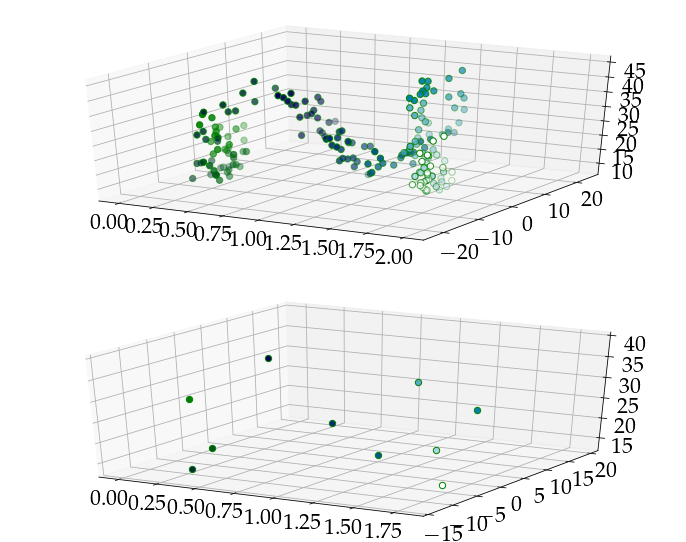

In [9]:
plot_results(FILENAMES3, 10)